In [2]:
import sys
sys.path.insert(0, "..")

import jax
import jax.numpy as jnp
import jax.random
from matplotlib import pyplot as plt

import module.samplers

In [3]:
def logprob(x):
    return -0.5*jnp.sum((x**2))*2

In [4]:
rkey = jax.random.PRNGKey(0)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [5]:
sampler = module.samplers.MCMC(logprob, (3,) ,1)

In [6]:
sampler.next_element(rkey, jnp.zeros(3,) + 3)

Array([3., 3., 3.], dtype=float32)

In [7]:
data = sampler.sample(rkey, jnp.zeros((3,)), 4000)

In [8]:
jax.random.split(rkey, 4)

Array([[2285895361, 1501764800],
       [1518642379, 4090693311],
       [ 433833334, 4221794875],
       [ 839183663, 3740430601]], dtype=uint32)

In [24]:
rkey, _ = jax.random.split(rkey)
sampler.sample_chains(rkey, 5, 3000)

Array([[[ 0.27229548, -0.22879672, -0.9946213 ],
        [ 0.27229548, -0.22879672, -0.9946213 ],
        [-0.26509356, -1.3905485 ,  0.9789133 ],
        ...,
        [-0.2575607 ,  0.1138736 ,  0.8102437 ],
        [-0.2575607 ,  0.1138736 ,  0.8102437 ],
        [-0.2575607 ,  0.1138736 ,  0.8102437 ]],

       [[ 0.43696094,  0.8516109 , -0.3740132 ],
        [ 0.43696094,  0.8516109 , -0.3740132 ],
        [ 0.43696094,  0.8516109 , -0.3740132 ],
        ...,
        [ 0.5990967 ,  0.08430922,  0.22604823],
        [ 0.5990967 ,  0.08430922,  0.22604823],
        [ 0.5990967 ,  0.08430922,  0.22604823]],

       [[ 0.6235719 ,  0.24861836,  0.16623712],
        [ 0.6235719 ,  0.24861836,  0.16623712],
        [ 0.54391766,  0.19870904,  0.18031386],
        ...,
        [ 0.2133401 ,  0.08121976, -0.07489496],
        [ 0.2133401 ,  0.08121976, -0.07489496],
        [ 0.2133401 ,  0.08121976, -0.07489496]],

       [[ 0.87224364, -0.17192197,  0.5828066 ],
        [ 0.6637187 ,  0

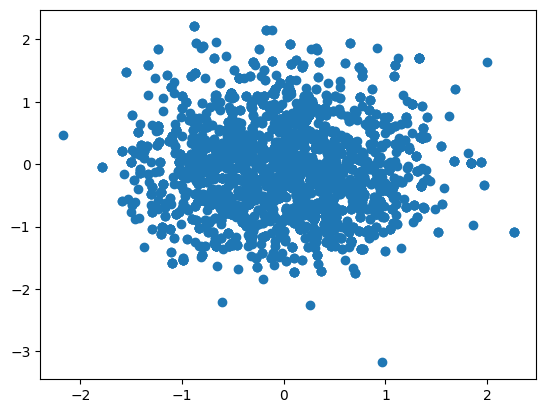

In [25]:
plt.scatter(data[:,0], data[:, 1])

In [26]:
element = jnp.array([0,0,0])

In [27]:
element.shape

(3,)

In [28]:
sampler.propose(rkey, element)

(Array([1498690236, 1561836495], dtype=uint32),
 Array([ 0.37039673, -0.12833096, -0.89666045], dtype=float32))

In [29]:
sampler.next_element(jax.random.PRNGKey(1), jnp.array([1,8,3]))

Array([1.0254381, 7.582553 , 1.215658 ], dtype=float32)

In [30]:
def f(data, bob):
    next_item = sampler.next_element(data[0], data[1])
    key, _ = jax.random.split(data[0])
    return ((key, next_item), next_item)

In [31]:
x = jax.lax.scan(f, (rkey, jnp.array([0.,0.,0.])), jnp.zeros((5000, 3)))[1]

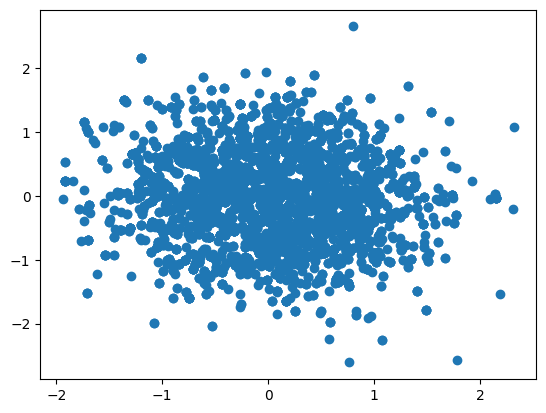

In [32]:
plt.scatter(x[:,0], x[:,1])